In [110]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('ds_salaries.csv')
df.drop(df.columns[8], axis = 1, inplace = True)


In [111]:
def create_sequence(data, seq_length):
    xlist = []
    ylist = []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        xlist.append(seq)
        ylist.append(data[i+seq_length])
    x_arr = np.array(xlist)
    y_arr = np.array(ylist)
    return x_arr, y_arr

In [112]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,CA,M


In [113]:
df.drop(df.columns[5], axis = 1, inplace = True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,85847,ES,ES,L
1,2023,MI,CT,ML Engineer,30000,30000,US,US,S
2,2023,MI,CT,ML Engineer,25500,25500,US,US,S
3,2023,SE,FT,Data Scientist,175000,175000,CA,CA,M
4,2023,SE,FT,Data Scientist,120000,120000,CA,CA,M


In [114]:
df.drop(df.columns[8], axis = 1, inplace = True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location
0,2023,SE,FT,Principal Data Scientist,80000,85847,ES,ES
1,2023,MI,CT,ML Engineer,30000,30000,US,US
2,2023,MI,CT,ML Engineer,25500,25500,US,US
3,2023,SE,FT,Data Scientist,175000,175000,CA,CA
4,2023,SE,FT,Data Scientist,120000,120000,CA,CA


In [115]:
df.drop(df.columns[3], axis = 1, inplace = True)
df.head()

,work_year,experience_level,employment_type,salary,salary_in_usd,employee_residence,company_location
0,2023,SE,FT,80000,85847,ES,ES
1,2023,MI,CT,30000,30000,US,US
2,2023,MI,CT,25500,25500,US,US
3,2023,SE,FT,175000,175000,CA,CA
4,2023,SE,FT,120000,120000,CA,CA


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   salary              3755 non-null   int64 
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   company_location    3755 non-null   object
dtypes: int64(3), object(4)
memory usage: 205.5+ KB


In [117]:
df["experience_level"].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [118]:
normalizando_experencia = {
    "EN":1,
    "MI":2,
    "SE":3,
    "EX":4
}

df['experience_level'] = df['experience_level'].map(normalizando_experencia)

df.head()

,work_year,experience_level,employment_type,salary,salary_in_usd,employee_residence,company_location
0,2023,3,FT,80000,85847,ES,ES
1,2023,2,CT,30000,30000,US,US
2,2023,2,CT,25500,25500,US,US
3,2023,3,FT,175000,175000,CA,CA
4,2023,3,FT,120000,120000,CA,CA


In [119]:
df.drop(df.columns[5], axis = 1, inplace = True)
df.head()

,work_year,experience_level,employment_type,salary,salary_in_usd,company_location
0,2023,3,FT,80000,85847,ES
1,2023,2,CT,30000,30000,US
2,2023,2,CT,25500,25500,US
3,2023,3,FT,175000,175000,CA
4,2023,3,FT,120000,120000,CA


In [120]:
df.drop(df.columns[5], axis = 1, inplace = True)
df.head()

,work_year,experience_level,employment_type,salary,salary_in_usd
0,2023,3,FT,80000,85847
1,2023,2,CT,30000,30000
2,2023,2,CT,25500,25500
3,2023,3,FT,175000,175000
4,2023,3,FT,120000,120000


In [121]:
normalizando_tipo_emprego = {
    "FT":1,
    "PT":2,
    "CT":3,
    "FL":4
}

df['employment_type'] = df['employment_type'].map(normalizando_tipo_emprego)

In [122]:
df["employment_type"].value_counts()

employment_type
1    3718
2      17
3      10
4      10
Name: count, dtype: int64

In [123]:
df.head()

,work_year,experience_level,employment_type,salary,salary_in_usd
0,2023,3,1,80000,85847
1,2023,2,3,30000,30000
2,2023,2,3,25500,25500
3,2023,3,1,175000,175000
4,2023,3,1,120000,120000


In [124]:
scaler = MinMaxScaler()
# df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)



In [125]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir a arquitetura do MLP
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
])

model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(64,activation='relu'))


# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary

# Treinar o modelo
model.fit(X_train, y_train, epochs=100, batch_size=36, validation_data=(X_test, y_test))

Epoch 1/100
84/84 [==============================] - 4s 11ms/step - loss: 27788154880.0000 - accuracy: 0.0000e+00 - val_loss: 20830179328.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
84/84 [==============================] - 0s 5ms/step - loss: 27481548800.0000 - accuracy: 0.0000e+00 - val_loss: 21528694784.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
84/84 [==============================] - 0s 5ms/step - loss: 25087866880.0000 - accuracy: 0.0000e+00 - val_loss: 20719077376.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
84/84 [==============================] - 0s 4ms/step - loss: 23743764480.0000 - accuracy: 0.0000e+00 - val_loss: 21498798080.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
84/84 [==============================] - 0s 4ms/step - loss: 22655219712.0000 - accuracy: 0.0000e+00 - val_loss: 21383577600.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
84/84 [==============================] - 0s 4ms/step - loss: 23120150528.0000 - accuracy: 0.0000e+00 - val_loss: 21320710144.0000 - val_accura

In [131]:
y_pred = model.predict(X_test)

print(len(y_pred))
print(len(y_test))

24/24 [==============================] - 0s 2ms/step
[[ 45498.047  44217.38   44387.844 ...  45135.254  44383.805  44234.574]
 [132915.11  132900.31  132913.88  ... 132806.58  133025.17  132830.92 ]
 [247580.66  247778.06  247839.95  ... 247221.69  247642.38  247512.72 ]
 ...
 [146288.28  146356.83  146354.58  ... 146142.7   146418.05  146176.23 ]
 [112778.22  112603.32  112681.09  ... 112743.695 112841.57  112804.516]
 [ 18170.38   17178.693  16858.416 ...  17979.736  17175.002  17253.94 ]]


ValueError: x and y must be the same size

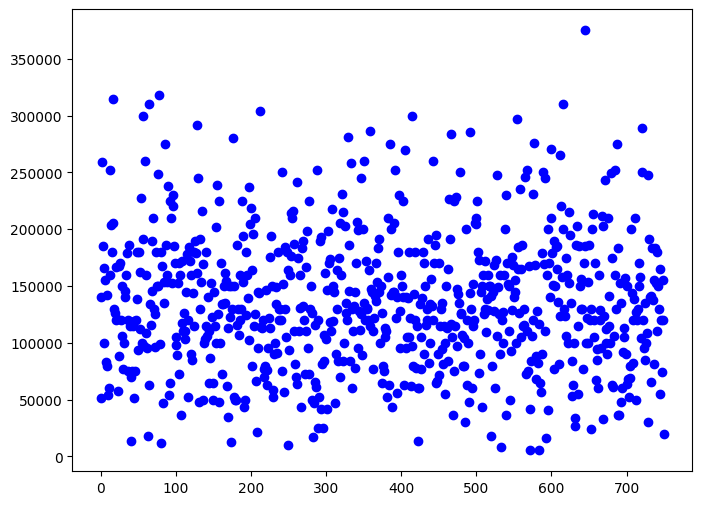

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Valor Real')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Valor Previsto')
plt.xlabel('ID')
plt.ylabel('Salário')
plt.legend()
plt.title('Gráfico de Dispersão - Valores Reais vs. Valores Previstos')
plt.show()